Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!pip install -q sklearn

In [3]:
%tensorflow_version 2.x

In [4]:
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

- Loading the data and performing data analysis, as the data is quiute uniform in ways like white wines are listed first followed by red wines.
- We'll also look into various parameters and their behaviour, on the dataset

In [5]:
dataset = pd.read_csv("https://raw.githubusercontent.com/Biswa5812/Machine-Learning/master/Wine%20Quality%20Analysis/datasets_35901_52633_winequalityN.csv")

In [6]:
dataset.head()  # looking into initial 5 rows of dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
dataset.tail()  # looking into last 5 rows of dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Before processing any dataset it important to replace all the null values for computation flexibility, and replace their values with the mean value of that particular row.

In [9]:
dataset.isnull().any()  

type                    False
fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [10]:
dataset['fixed acidity'].fillna(dataset['fixed acidity'].mean(),inplace = True)

In [11]:
dataset.isnull().any()

type                    False
fixed acidity           False
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
quality                 False
dtype: bool

In [12]:
dataset['volatile acidity'].fillna(dataset['volatile acidity'].mean(),inplace = True)
dataset['citric acid'].fillna(dataset['citric acid'].mean(),inplace = True)
dataset['residual sugar'].fillna(dataset['residual sugar'].mean(),inplace = True)
dataset['chlorides'].fillna(dataset['chlorides'].mean(),inplace = True)
dataset['pH'].fillna(dataset['pH'].mean(),inplace = True)
dataset['sulphates'].fillna(dataset['sulphates'].mean(),inplace = True)

In [13]:
dataset.isnull().any()  # Now we have removed all missing or null values and replaced them by the mean.

type                    False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Now, let's look into how each feature affects the quality of the Wine by plotting various graphs and histograms.

In [14]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


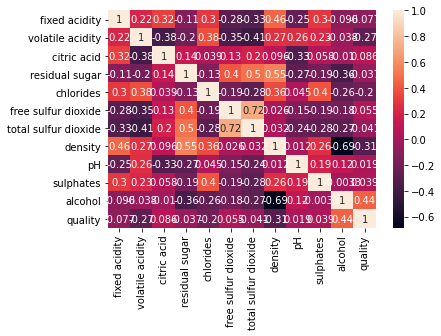

In [15]:
import seaborn as sn

corrmat = dataset.corr()
sn.heatmap(corrmat,annot = True)

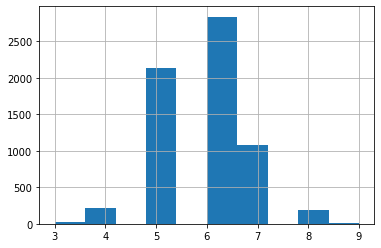

In [16]:
dataset.quality.hist(bins=10)

Text(0, 0.5, 'volatile acidity')

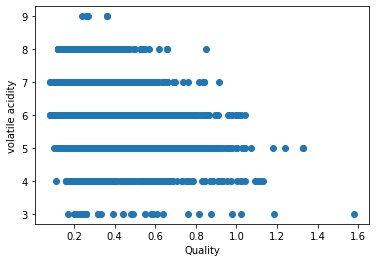

In [17]:
plt.scatter(dataset['volatile acidity'],dataset['quality'])
plt.xlabel("Quality")
plt.ylabel('volatile acidity')

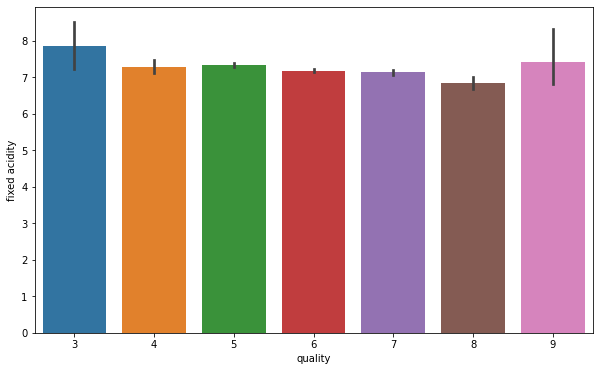

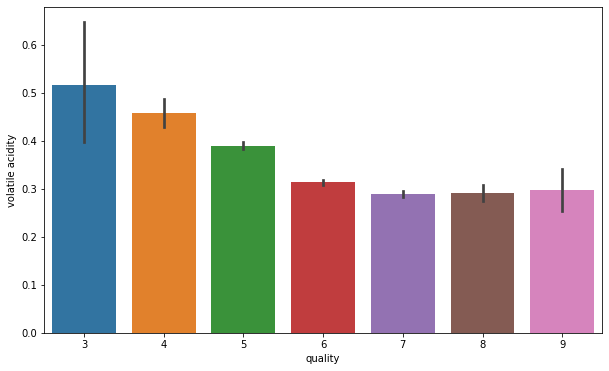

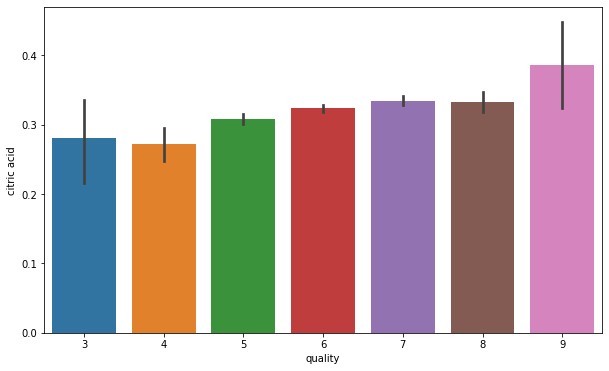

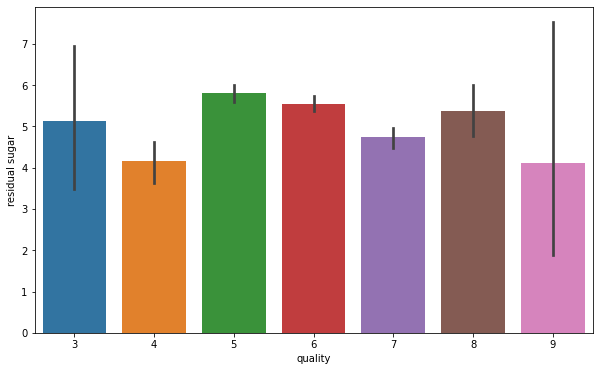

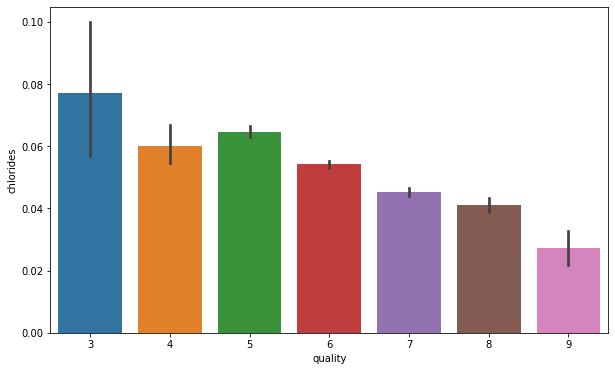

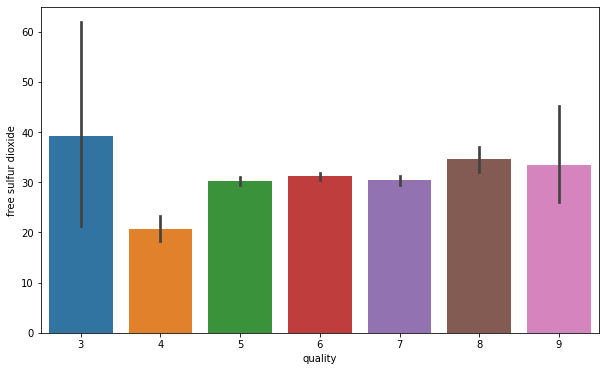

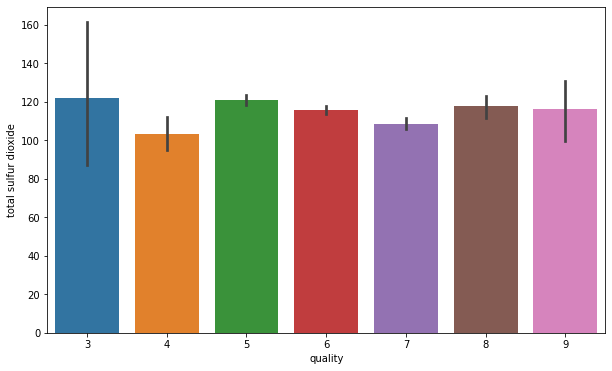

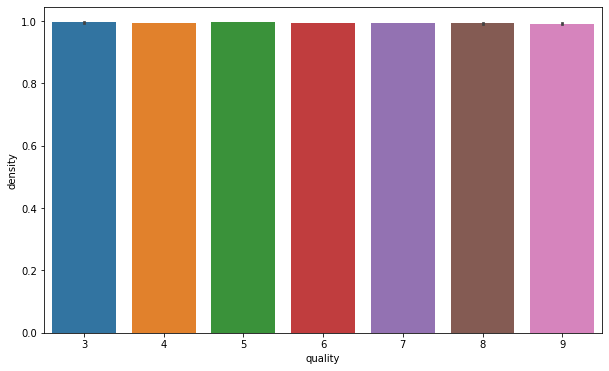

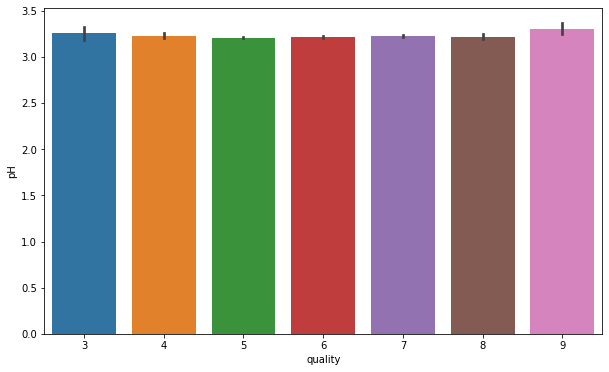

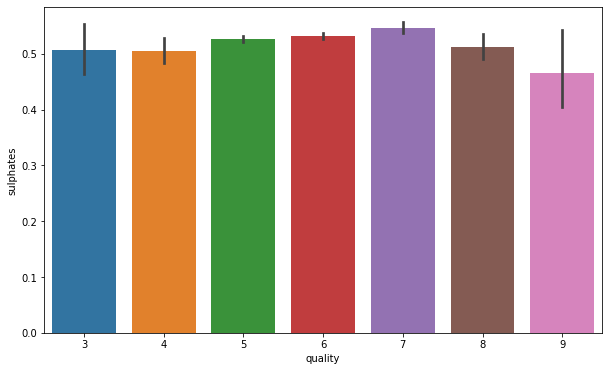

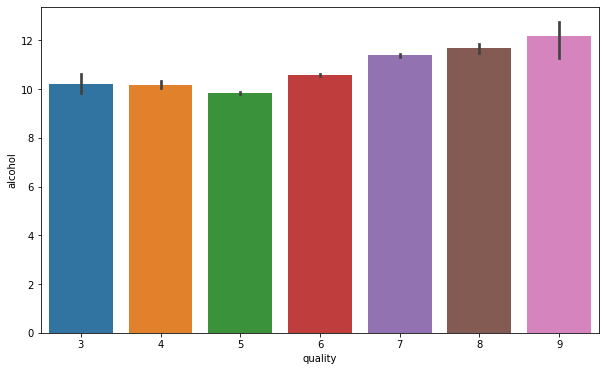

In [18]:
# Now we will se the variations of each factor against the overall quality,

columns = list(dataset.columns)
columns.remove('type')
columns.remove('quality')


for i in columns:
  fig = plt.figure(figsize = (10,6))
  sn.barplot(x = 'quality', y = i, data = dataset)

Since the data is in ordered format we will shuffle the dataframe before dividing into train and test.

In [19]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [20]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.7,0.28,0.34,8.9,0.048,32.0,111.0,0.99455,3.25,0.54,11.0,7
1,white,7.4,0.25,0.36,13.2,0.067,53.0,178.0,0.99760,3.01,0.48,9.0,6
2,red,8.5,0.32,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,7
3,red,8.3,0.58,0.13,2.9,0.096,14.0,63.0,0.99840,3.17,0.62,9.1,6
4,white,7.2,0.16,0.35,1.2,0.031,27.0,84.0,0.99280,3.33,0.34,9.9,5


In [21]:
dataset.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,8.8,0.37,0.48,2.1,0.097,39.0,145.0,0.99750,3.04,1.03,9.3,5
6493,white,6.3,0.20,0.19,12.3,0.048,54.0,145.0,0.99668,3.16,0.42,9.3,6
6494,white,6.8,0.25,0.28,5.0,0.035,42.0,126.0,0.99048,3.12,0.38,12.6,7
6495,white,6.9,0.19,0.35,1.7,0.036,33.0,101.0,0.99315,3.21,0.54,10.8,7
6496,white,6.9,0.19,0.28,5.0,0.058,14.0,146.0,0.99520,3.29,0.36,9.1,6


As you can see and compare these results of .head() and .tail() from previous ones, we have shuffled the whole dataset.

In [22]:
for i in range(len(dataset['quality'])):
    if dataset['quality'][i] <= 6.5:
        dataset['quality'][i] = 0
    else:
        dataset['quality'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
lb = LabelEncoder()

dataset['type'] = lb.fit_transform(dataset['type'])

# Training and Testing

We divide the dataset into dependent and independent variables, and convert them into numpy arrays.
Also, as we can see we have large differences in the values hence we scale all the values inside columns, so that its distribution will have a mean value 0 and standard deviation of 1.

In [24]:
x = dataset.iloc[:,0:12].values
y = dataset.iloc[:,12:].values

In [25]:
x # we will scale these values

array([[ 1.  ,  6.7 ,  0.28, ...,  3.25,  0.54, 11.  ],
       [ 1.  ,  7.4 ,  0.25, ...,  3.01,  0.48,  9.  ],
       [ 0.  ,  8.5 ,  0.32, ...,  3.14,  0.71, 11.8 ],
       ...,
       [ 1.  ,  6.8 ,  0.25, ...,  3.12,  0.38, 12.6 ],
       [ 1.  ,  6.9 ,  0.19, ...,  3.21,  0.54, 10.8 ],
       [ 1.  ,  6.9 ,  0.19, ...,  3.29,  0.36,  9.1 ]])

In [26]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [27]:
sc = StandardScaler()

In [28]:
x = sc.fit_transform(x)
x

array([[ 0.57136659, -0.39870232, -0.36278624, ...,  0.19676009,
         0.05905506,  0.42611996],
       [ 0.57136659,  0.14156636, -0.54511832, ..., -1.29740753,
        -0.34428771, -1.2508602 ],
       [-1.75018984,  0.99056   , -0.1196768 , ..., -0.48806674,
         1.2018596 ,  1.09691202],
       ...,
       [ 0.57136659, -0.32152108, -0.54511832, ..., -0.6125807 ,
        -1.01652567,  1.76770409],
       [ 0.57136659, -0.24433984, -0.90978249, ..., -0.05226785,
         0.05905506,  0.25842195],
       [ 0.57136659, -0.24433984, -0.90978249, ...,  0.44578803,
        -1.15097327, -1.16701119]])

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [30]:
x_train.shape

(5197, 12)

In [31]:
x_test.shape

(1300, 12)

In [32]:
y_train.shape

(5197, 1)

In [33]:
y_test.shape

(1300, 1)

We also apply standard scaling to the training and testing data

In [34]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Random Forest

In [35]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_prediction = rfc.predict(x_test)

In [37]:
print(accuracy_score(y_test,y_prediction))

0.8953846153846153


# K nearest neighbours

In [38]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [39]:
y_prediction = kn.predict(x_test)

In [40]:
print(accuracy_score(y_test,y_prediction))

0.8592307692307692


# Support Vector Machine

In [41]:
s = SVC()
s.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_prediction = s.predict(x_test)
print(accuracy_score(y_test,y_prediction))

0.8453846153846154


# Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_prediction = lr.predict(x_test)
print(accuracy_score(y_test,y_prediction))

0.8384615384615385
